# 딥러닝 구조 연습

* 섭씨 -> 화씨
* 공식: T(화씨) = T(섭씨) * 9/5 + 32
* 섭씨와 화씨의 관계는 위의 공식에 의해 이미 알고 있는 내용이다.
* 텐서플로우는 썹씨와 화씨의 데이터를 통해 어떤 방정식을 만들어 내는지 알아봅시다.

In [1]:
import tensorflow
tensorflow.__version__

'2.10.0'

## 딥러닝 구성하는 순서

신경망 생성 -> 모델 compile -> 모델 fit (훈련)-> 모델 predict (예측)-> 모델 저장(save)

## 라이브러리 로드

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

## 데이터 로드

In [3]:
temp_df = pd.read_csv('./data/Celsius-to-Fahrenheit.csv')
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [4]:
temp_df.info() # 30 entries : 30개 데이터. 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


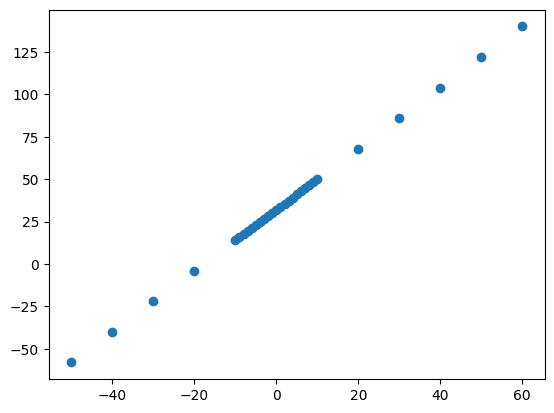

In [7]:
plt.scatter(temp_df['Celsius'], temp_df['Fahrenheit'])
plt.show()

In [ ]:
# 딥러닝은 이 관계를 어떻게 표현할지 알아보자

## 데이터 준비

In [8]:
# 컬럼 추출해서 변수에 할당
x_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [10]:
# 데이터 준비했으면 쉐입, 차원, 타입 확인
x_train.shape # 30행 1열구조.=> 30개의 샘플이 1가지 피처에 대한 내용

(30,)

In [9]:
y_train.shape

(30,)

## 딥러닝 구성하기

model = Sequential() :  입력층, 은닉층, 출력층을 차곡차곡 쌓아서 순서대로 실행되도록 하는 모델 생성

```python
Dense(노드 갯수, input_dim=입력 갯수)
```


**[참고]**
tensorflow에서 모델을 생성하는 방법
1. Sequential : 해결하려는 문제들에 대해서 95%정도 처리가 가능
2. Functional : Sequential한 방법으로도 해결되지 않을 경우에 적용
3. Subclass Google에서도 추천하지 않는 방법, 모델을 실제로 깊이 있게 연구하는 사람

In [ ]:
# 시퀀셜 객체 만들고 덴스 층을 추가, 추가 하는 형태로 네트워크 구성

In [11]:
# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
# 딥러닝 모델 생성

model = Sequential()
# 레이어를 추가해서 차례로 시퀀셜할수있는 박스를 하나 만든다
# =모델이라는 시퀀셜 객체 생성

In [12]:
model.add(Dense(units = 1, input_dim=1)) 
# Dense : 이 층이 노드를 몇개 만들거니. 입력은 몇 차원이니. 쉐입이 무엇이니 지정.
# units = 1 : 1만 표기해도 됨
# input_dim=1 : 1차원

In [ ]:
#입력1개, 유닛1개인 Dense층 구성
# model.add(Dense(units=1, input_shape=[1]))

## 딥러닝 설정하기

* 지정한 모델이 효과적으로 구현될 수 있게 환경을 설정해주는 부분
* 손실함수, 경사하강법,평가지표 등의 정보 설정


* 오차를 어떻게 측정할껀데? 손실함수
* 오차를 가중치에 어떻게 적용할껀데? 경사하강법

In [14]:
# 딥러닝을 설정합니다.
# 회귀이기 때문에 손실함수는 MSE : loss=
# 경사하강법은 일반적으로 성능이 제일 좋다는 아담. : optimizer=

model.compile(loss='mean_squared_error', optimizer='Adam')

## 딥러닝 훈련하기

In [17]:
# epochs = 모든 샘플에 대해 한 번 훈련하는 것을 1에포크, 모든 샘플을 100번 재사용해서 훈련하라

epoch_hist = model.fit(x_train, y_train, epochs=100)

# 30개의 샘플을 1번 훈련하는 것을 1에포크
# => 100에포크는 100번 훈련

# 훈련을 거듭하면서 loss가 줄어듬

Epoch 1/100
1/1 [==============================] - 0s 5ms/step - loss: 1246.5203
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1245.8292
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1245.1393
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1244.4507
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1243.7632
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 1243.0769
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1242.3920
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1241.7081
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 1241.0256
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 1240.3441
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 1239.6642
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 1238.9855
Epoch 13/100
1/1 [=======

In [ ]:
# batch_size = 샘플을 한 번에 몇 개씩 처리할 것인지 정하는 부분, 30개 샘플 중에서 10개씩 끊어서 집어넣어라.
# batch_size가 너무 크면 속도 저하, 너무 작으면 실행 값의 편차가 생겨 불안정해짐.

# epoch_hist = model.fit(x_train, y_train, epochs=100,batch_size=10)

In [18]:
#학습끝나고
#평가하자
epoch_hist.history.keys()

dict_keys(['loss'])

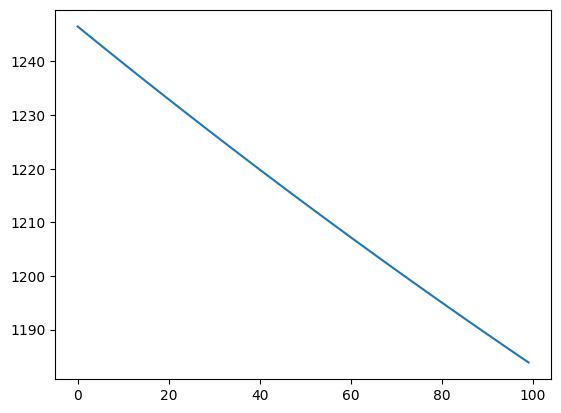

In [21]:
plt.plot(epoch_hist.history['loss'])
plt.show()

## 평가하기

In [22]:
model.evaluate(x_train, y_train) # 오차가 너무 크다 #100에포크이지만 학습이 제대로 이루어지지않음

1/1 [==============================] - 0s 89ms/step - loss: 1183.2930


1183.29296875

## 예측하기

In [ ]:
#T(화씨) = T(섭씨) * 9/5 + 32


## 전체 코드

## 성능향상

In [ ]:
#에포크를 더 늘리면..
